# Module 2 RNN and LSTM

## Implement RNN in Numpy

In [1]:
import numpy as np
timesteps = 10
input_features = 3
output_features = 5
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t


In [ ]:
#inputs
#successive_outputs

## Simple RNN

In [2]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000

# Cut texts after this number of words 
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 50))
model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          500000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2656      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 502,689
Trainable params: 502,689
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 0.5553 - acc: 0.7045 - val_loss: 0.5123 - val_acc: 0.7543
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4253 - acc: 0.8034 - val_loss: 0.5298 - val_acc: 0.7524
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3388 - acc: 0.8546 - val_loss: 0.5467 - val_acc: 0.7567
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2429 - acc: 0.9029 - val_loss: 0.6250 - val_acc: 0.7381
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1657 - acc: 0.9387 - val_loss: 0.7801 - val_acc: 0.6983
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1140 - acc: 0.9580 - val_loss: 0.9040 - val_acc: 0.6897
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0783 - acc: 0.9729 - val_loss: 0.9725 - val_acc: 0.6989
Epoch 8/10
782/782 [==============================] - 5s 6ms/step - loss: 0.

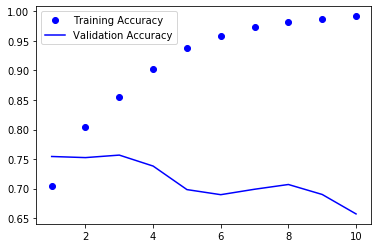

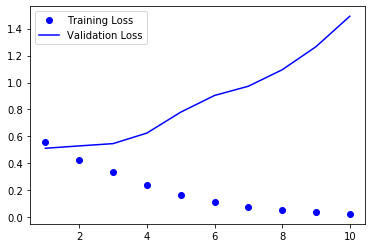

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training Loss')
plt.plot(epochs, val_loss,'b',label='Validation Loss')
plt.legend()

plt.show()

## LSTM 

In [7]:
from keras.layers import Dense, LSTM,GRU

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

#model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 9s 10ms/step - loss: 0.5340 - acc: 0.7246 - val_loss: 0.4779 - val_acc: 0.7668
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4327 - acc: 0.7965 - val_loss: 0.4647 - val_acc: 0.7725
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4006 - acc: 0.8154 - val_loss: 0.4866 - val_acc: 0.7660
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3749 - acc: 0.8317 - val_loss: 0.4931 - val_acc: 0.7677
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3520 - acc: 0.8457 - val_loss: 0.5350 - val_acc: 0.7584
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3280 - acc: 0.8594 - val_loss: 0.5114 - val_acc: 0.7669
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3066 - acc: 0.8693 - val_loss: 0.5021 - val_acc: 0.7618
Epoch 8/10
782/782 [==============================] - 8s 10ms/step - los

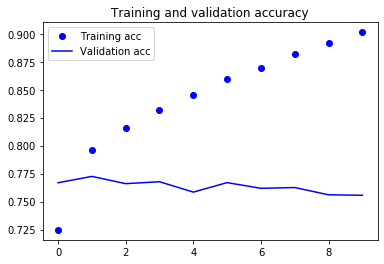

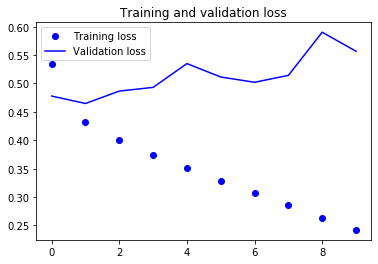

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Ex: GRU

In [9]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 10s 10ms/step - loss: 0.5357 - acc: 0.7208 - val_loss: 0.4861 - val_acc: 0.7598
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4404 - acc: 0.7908 - val_loss: 0.4685 - val_acc: 0.7720
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.4118 - acc: 0.8098 - val_loss: 0.4651 - val_acc: 0.7748
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3909 - acc: 0.8220 - val_loss: 0.4763 - val_acc: 0.7790
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3675 - acc: 0.8348 - val_loss: 0.4620 - val_acc: 0.7788
Epoch 6/10
782/782 [==============================] - 7s 10ms/step - loss: 0.3443 - acc: 0.8482 - val_loss: 0.4699 - val_acc: 0.7783
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3236 - acc: 0.8597 - val_loss: 0.4803 - val_acc: 0.7778
Epoch 8/10
782/782 [==============================] - 7s 10ms/step 

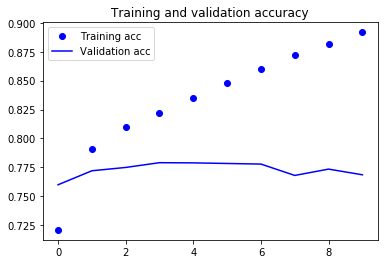

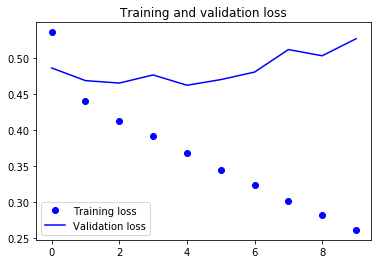

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Dropout

In [11]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(GRU(32,dropout=0.2,recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 12s 14ms/step - loss: 0.5488 - acc: 0.7109 - val_loss: 0.4843 - val_acc: 0.7620
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4519 - acc: 0.7847 - val_loss: 0.4809 - val_acc: 0.7640
Epoch 3/10
782/782 [==============================] - 11s 13ms/step - loss: 0.4278 - acc: 0.8022 - val_loss: 0.4757 - val_acc: 0.7759
Epoch 4/10
782/782 [==============================] - 11s 13ms/step - loss: 0.4079 - acc: 0.8114 - val_loss: 0.4657 - val_acc: 0.7770
Epoch 5/10
782/782 [==============================] - 11s 13ms/step - loss: 0.3918 - acc: 0.8220 - val_loss: 0.4688 - val_acc: 0.7783
Epoch 6/10
782/782 [==============================] - 11s 13ms/step - loss: 0.3749 - acc: 0.8316 - val_loss: 0.4864 - val_acc: 0.7750
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.3619 - acc: 0.8390 - val_loss: 0.4731 - val_acc: 0.7732
Epoch 8/10
782/782 [==============================] - 11s 14ms

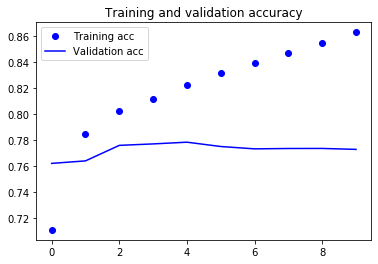

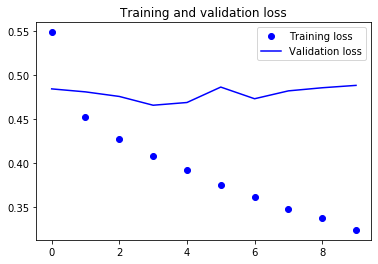

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Stacked RNN

In [16]:
from keras.layers import Dense, LSTM,GRU, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

#model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 28s 30ms/step - loss: 0.5322 - acc: 0.7218 - val_loss: 0.4872 - val_acc: 0.7628
Epoch 2/10
782/782 [==============================] - 23s 30ms/step - loss: 0.4397 - acc: 0.7926 - val_loss: 0.5358 - val_acc: 0.7597
Epoch 3/10
782/782 [==============================] - 24s 31ms/step - loss: 0.4106 - acc: 0.8113 - val_loss: 0.4782 - val_acc: 0.7743
Epoch 4/10
782/782 [==============================] - 23s 29ms/step - loss: 0.3856 - acc: 0.8276 - val_loss: 0.4730 - val_acc: 0.7665
Epoch 5/10
782/782 [==============================] - 23s 30ms/step - loss: 0.3614 - acc: 0.8414 - val_loss: 0.4735 - val_acc: 0.7695
Epoch 6/10
782/782 [==============================] - 23s 29ms/step - loss: 0.3355 - acc: 0.8550 - val_loss: 0.4904 - val_acc: 0.7737
Epoch 7/10
782/782 [==============================] - 24s 31ms/step - loss: 0.3061 - acc: 0.8685 - val_loss: 0.5015 - val_acc: 0.7600
Epoch 8/10
782/782 [==============================] - 24s 31ms

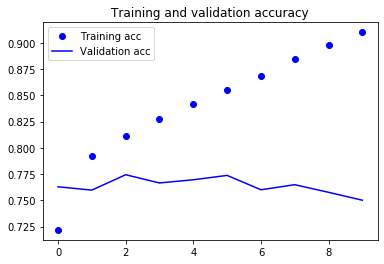

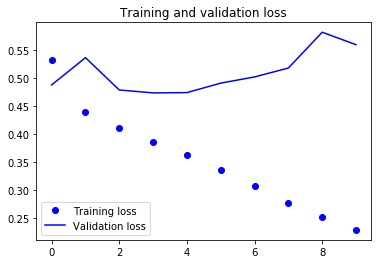

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## BiDirectional RNN

In [19]:
from keras.layers import GRU
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 50))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 11s 11ms/step - loss: 0.5258 - acc: 0.7293 - val_loss: 0.4916 - val_acc: 0.7556
Epoch 2/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4366 - acc: 0.7948 - val_loss: 0.4665 - val_acc: 0.7712
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.4083 - acc: 0.8112 - val_loss: 0.4726 - val_acc: 0.7750
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 0.3864 - acc: 0.8252 - val_loss: 0.4846 - val_acc: 0.7643
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3673 - acc: 0.8342 - val_loss: 0.4848 - val_acc: 0.7702
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3475 - acc: 0.8472 - val_loss: 0.4916 - val_acc: 0.7720
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3234 - acc: 0.8618 - val_loss: 0.5015 - val_acc: 0.7490
Epoch 8/10
782/782 [==============================] - 8s 10ms/step 

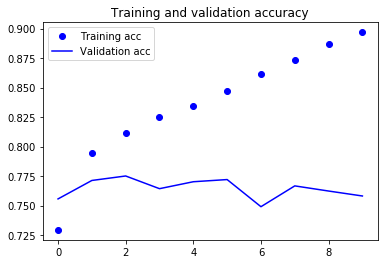

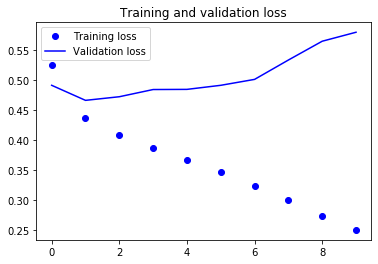

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()